# CLASE 2.1: ESTRUCTURAS DE DATOS FUNDAMENTALES DE PANDAS.
---

## Introducción.
En las secciones anteriores, estudiamos en detalle el uso del módulo **Numpy** para trabajar con arreglos de datos gracias a su objeto `numpy.ndarray`. Ahora nos dedicaremos al estudio de otro tipo de estructura de datos provisto por la librería **Pandas** de Python. Dicha librería está construida sobre **Numpy**, siendo una de sus grandes características la implementación de un objeto muy conocido en la ciencia de datos como `pandas.DataFrame`. Los *DataFrames* son, en esencia, arreglos multidimensionales con etiquetas o rótulos que distinguen tanto sus filas como sus columnas, y que son capaces de almacenar varios tipos de datos (incluso registros o “celdas” con valores faltantes). También poseen una interfaz de almacenamiento muy cómoda para usuarios familiarizados con hojas de cálculo, como las usadas típicamente en programas como MS Excel®, SPSS o Minitab.

De la misma forma que ocurre con **Numpy**, **Pandas** suele venir incluido en la instalación por defecto de la suite de Anaconda®. Siempre podremos hacer una instalación limpias de **Pandas** desde el índice de paquetes de Python como:

`pip install pandas`

La importación de **Pandas**, en la práctica, suele hacerse mediante el prefijo `pd`. De esta manera, al iniciar nuestra sesión, escribiremos:

In [1]:
import numpy as np
import pandas as pd

Usaremos esta convención durante el resto de la asignatura.

En un nivel muy básico de entendimiento, los objetos de **Pandas** pueden ser pensados como versiones mejoradas de los arreglos de **Numpy**, en los cuales las filas y las columnas son identificados con rótulos o etiquetas en vez de simples números enteros. Como veremos durante el trascurso de esta asignatura, **Pandas** nos provee de una serie de útiles herramientas, métodos y funcionalidades muy eficientes para el trabajo con este tipo de estructuras, pero casi todas ellas requieren de un completo entendimiento de las mismas. Por lo tanto, antes de ir en detalle, introduciremos las tres estructuras fundamentales de **Pandas**, agrupadas en tres objetos: `pandas.Series` (series), `pandas.DataFrame` (DataFrames) y `pandas.Index` (índices).

Antes de proceder con los contenidos relativos al uso de la librería **Pandas**, vale la pena comentar que, en esta sección, jugaremos un poco con la elaboración de algunos gráficos. Aprovecharemos, para tales efectos, la posibilidad de los notebooks para mostrar gráficos interactivos siempre que el backend utilizado corresponda a la librería **Matplotlib**, que será la que veremos una vez finalicemos con las lecciones relativas a **Pandas**. Para mostrar figuras interactivas, haremos uso del siguiente *código mágico*:

In [2]:
%matplotlib notebook

Y ya estamos listos para proceder.

## Series.
En **Pandas**, una serie se define como un arreglo unidimensional que permite almacenar datos en un número arbitrario de observaciones. Sin embargo, dicho arreglo unidimensional posee dos diferencias esenciales con el típico arreglo de **Numpy**: Dispone de un índice que permite identificar cualquier fila del arreglo con un rótulo arbitrario (no necesariamente un número entero), y permiten almacenar data que no necesariamente es del mismo tipo. Una serie de **Pandas** puede construirse de manera rápida mediante la clase `pd.Series()`, la cual considera, como mínimo, un argumento denominado data, que representa por supuesto la data a imputar en esta estructura:

In [3]:
# Construimos la serie a partir de una lista de Python.
data = pd.Series(data=[0.25,  0.5, 0.75,  1.0])

In [4]:
# Mostramos la serie en pantalla.
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Vemos que, al mostrar la serie en pantalla, no solamente se destaca la **data** o **valores** que hemos imputado a la misma, sino que además cada observación (fila) de la serie viene rotulada por un número. Este conjunto de valores que etiquetan a estas observaciones es llamado **índice de la serie**. Su función es permitir una selección rápida y, en lo posible, sin ambigüedad de los elementos que sean de nuestro interés en la serie. 

Por otro lado, también se muestra el **tipo de dato** que se ha almacenado en nuestra serie. En este caso, vemos que la misma está constituida por números de punto flotante de 64 bits.

Los tres elementos mencionados previamente constituyen atributos propios de una serie. De esta manera, si queremos simplemente trabajar con los valores de una serie, bastará con usar su atributo `values`, el cual nos retornará un arreglo unidimensional de **Numpy** constituido únicamente por los valores que están almacenados en la serie:

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

Por otro lado, el índice de la serie (en el cual profundizaremos un poco más adelante) puede individualizarse mediante el atributo `index`:

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

El índice corresponde a un objeto del tipo pd.Index, exclusivo de **Pandas**. En el ejemplo, tal índice es simplemente un rango de valores que va desde el 0 hasta antes del 4, con un paso igual a 1 (similar a un rango construido mediante la función `np.arange(start=0, stop=4, step=1)`). La selección de valores de interés en la serie se realiza por medio de este índice, de la misma forma en que lo haríamos con un arreglo unidimensional de **Numpy**:

In [7]:
# Selección individual de elementos.
data[1]

0.5

In [8]:
# Selección mediante slicing.
data[1:3]

1    0.50
2    0.75
dtype: float64

Si bien son parecidas, las series son estructuras de datos que son mucho más generales y flexibles que los arreglos unidimensionales de **Numpy**. La diferencia esencial entre ambos es, naturalmente, la presencia del objeto `pd.Index`: Mientras que el arreglo de **Numpy** tiene siempre un índice entero definido de forma implícita que usamos para acceder selectivamente a los valores que son de nuestro interés, una de serie de **Pandas** tiene un índice explícitamente definido, que está asociado a los valores que tiene almacenados, de la misma forma que ocurre en un diccionario de Python, en la relación llave - valor.

Esta definición explícita le da a las series capacidades adicionales. Por ejemplo, el índice no debe ser necesariamente un entero, ya que podemos usar el tipo de datos que nosotros queramos para definirlo. Por ejemplo, podemos usar strings, creando la serie y usando el argumento `index` para construir un índice según nuestras necesidades:

In [9]:
# Definición explícita del índice en una serie.
data = pd.Series(data=[0.25,  0.5, 0.75,  1.0], index=["a", "b", "c", "d"])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

Como cabría esperar, el acceso a los datos es conforme el índice que hemos definido:

In [10]:
# Seleccionamos la data conforme el índice que hemos creado.
data["b"]

0.5

Notemos que, como hemos creado una serie cuyo índice está constituido por strings, cualquier selección que explicitemos requerirá especificar dicho string entre comillas, como en el ejemplo anterior.

Al construir una serie, no estaremos en absoluto limitados por ningún criterio más que el sentido común a la hora de indexar los valores que se almacenan en ella. De este modo, si un índice está conformado por números enteros, éstos ni siquiera tienen por qué estar ordenados:

In [11]:
# El índice de una serie no tiene por qué seguir un orden lógico.
data = pd.Series([0.25,  0.5, 0.75,  1.0], index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

Notemos que el segundo elemento almacenado en la serie se corresponde con el índice 5, y no 2. Como no hay ambigüedad, al seleccionar ese elemento, **Pandas** lo identificará de inmediato:

In [12]:
data[5]

0.5

La correspondencia entre el par (índice, valor) en las series de **Pandas** permiten formular la abstracción de que las series, además de ser versiones especializadas de los arreglos unidimensionales de **Numpy**, también pueden ser versiones generales de los diccionarios nativos de Python. Recordemos que los diccionarios son estructuras de datos que relacionan un valor determinado a un único rótulo, que llamamos llave, de tal forma que siempre que deseemos recuperar un determinado valor de un diccionario, haremos uso de su correspondiente llave. Un ejemplo de diccionario es el siguiente:

In [13]:
# Un diccionario con la información relativa a la producción de cobre fino (en ktmh)
# para distintas operaciones mineras en Chile (2021).
production_dict = {
    "Escondida": 1011,
    "Collahuasi": 630,
    "El Teniente": 460,
    "Los Bronces": 370,
    "Los Pelambres": 336,
    "Radomiro Tomic": 326,
    "Chuquicamata": 319,
    "Centinela": 274,
    "Spence": 203,
    "Sierra Gorda": 198,
    "Ministro Hales": 182,
    "Andina": 177,
    "Candelaria": 119,
    "Caserones": 110,
    "Gabriela Mistral": 101
}

No existe ningún problema al convertir este diccionario en una serie por medio de la clase `pd.Series()`. De hecho, al hacerlo, las llaves del diccionario serán transformadas inmediatamente en los índices de la serie, mientras que los valores anexados a cada llave serán los valores anexados a cada índice de la serie resultante:

In [14]:
# Todo diccionario puede transformarse en una serie.
production_data = pd.Series(production_dict)
production_data

Escondida           1011
Collahuasi           630
El Teniente          460
Los Bronces          370
Los Pelambres        336
Radomiro Tomic       326
Chuquicamata         319
Centinela            274
Spence               203
Sierra Gorda         198
Ministro Hales       182
Andina               177
Candelaria           119
Caserones            110
Gabriela Mistral     101
dtype: int64

Vemos pues que la serie preserva incluso el orden original en el cual fueron definidas las llaves en nuestro diccionario, además del tipo de dato que caracteriza a los valores de la misma (en este caso, números enteros).

El acceso a la información de la serie `production_data` es muy intuitivo. Si quisiéramos acceder a la data asociada a la producción anual (2021) de la mina Candelaria, bastará con usar el índice respectivo para consultar dicha información:

In [15]:
# La selección de información en series es muy intuitiva.
production_data["Candelaria"]

119

Los slicings de información deben tener en consideración el orden de los índices que definen la serie. De este modo, si queremos seleccionar la data de producción entre las minas El Teniente y Chuquicamata, bastará con que escribamos:

In [16]:
# El slicing también es posible, y preserva el orden original de los índices.
production_data["El Teniente": "Chuquicamata"]

El Teniente       460
Los Bronces       370
Los Pelambres     336
Radomiro Tomic    326
Chuquicamata      319
dtype: int64

La serie, en virtud de su estructura del tipo arreglo unidimensional (pero con mayor flexibilidad) de **Numpy**, puede ser utilizada para operar de la misma forma que lo haríamos con estructuras de este tipo en **Numpy**. Sin embargo, la presencia del índice en una serie sirve como referencia para todas las operaciones queramos realizar. Por lo tanto, al operar aritméticamente con dos o más series, tales operaciones siempre intentarán generar empates entre elementos que compartan el mismo índice. Esto se conoce como **alineamiento de índices**:

In [17]:
# Demanda mundial de cobre refinado, proyeccion 2020 (en ktmf).
cu_dem_20 = pd.Series(
    data=[12807, 3472, 1702, 930, 410, 696, 446, 358],
    index=["China", "Europa", "EE.UU.", "Japon", "India", "Corea", "Turquia", "Mexico"],
)

In [18]:
# Demanda mundial de cobre refinado, proyeccion 2021 (en ktmf).
cu_dem_21 = pd.Series(
    data=[13063, 3594, 1753, 949, 484, 706, 463, 369],
    index=["China", "Europa", "EE.UU.", "Japon", "India", "Corea", "Turquia", "Mexico"],
)

In [19]:
# La suma de ambas series alinea los índices en ambos casos.
cu_dem_20 + cu_dem_21

China      25870
Europa      7066
EE.UU.      3455
Japon       1879
India        894
Corea       1402
Turquia      909
Mexico       727
dtype: int64

La serie resultante de la suma `cu_dem_20 + cu_dem_21` contiene la unión de los índices que caracterizan a los datos en `cu_dem_20` y `cu_dem_21`. Como ambas series tienen el mismo índice, éste se preserva en el resultado de la suma, y se alinea en relación a las sumas respectivas elemento a elemento.

Por otro lado, si operamos aritméticamente con series que tienen distintos índices, la serie resultante tendrá como índice a la unión de los índices de las series con las que operamos, pero sólo se tendrán resultados de la operación para los índices que aparecen en las series individuales. Para el resto de las posiciones, no se hará ningún cálculo, y **Pandas** rellenará esos valores con `nan` (que, recordemos, es la convención utilizada para representar data faltante: *“Not a number”*).

In [20]:
# Mineral transportado por camiones de una flota un día determinado.
ore_transp_1 = pd.Series(
    data=[1291, 1334, 480, 851, 1180],
    index=["C251", "C256", "C224", "C231", "C265"]
)

In [21]:
# Mineral transportado por camiones de una flota al día siguiente del anterior.
ore_transp_2 = pd.Series(
    data=[251, 1291, 1332, 456, 1210],
    index=["C221", "C231", "C251", "C230", "C274"]
)

In [22]:
# Cuando las series no tienen los mismos índices, sólo obtendremos resultados para aquellos
# que están definidos en todas las series, obteniendo un NaN como resultado en el resto de los
# índices.
ore_transp_1 + ore_transp_2

C221       NaN
C224       NaN
C230       NaN
C231    2142.0
C251    2623.0
C256       NaN
C265       NaN
C274       NaN
dtype: float64

Toda serie puede ser inicializada a partir de un único valor escalar. De ser el caso, el número de valores que tenga la serie será igual al número de elementos definidos en su índice al haberla construido:

In [23]:
# Podemos iniciar siempre una serie mediante un escalar.
scalar_series = pd.Series(data=42, index=["a", "b", "c", "d"])
scalar_series

a    42
b    42
c    42
d    42
dtype: int64

Toda serie puede *“bautizarse”* con un nombre, el cual permite rotular los valores de la misma. Podemos darle nombre a una serie mediante su constructor, con el argumento `name`:

In [24]:
# Podemos usar el argumento name en el constructor de una serie para rotular los datos.
ser = pd.Series(
    data=[5.5, 4.8, 6.3, 6.5, 6.2],
    index=["P1", "P2", "P3", "P4", "P5"],
    name="qualifications",
)
ser

P1    5.5
P2    4.8
P3    6.3
P4    6.5
P5    6.2
Name: qualifications, dtype: float64

El nombre de una serie también puede definirse mediante el atributo `name`:

In [25]:
# El atributo name permite cambiar el nombre de una serie
ser.name = "Notas"
ser

P1    5.5
P2    4.8
P3    6.3
P4    6.5
P5    6.2
Name: Notas, dtype: float64

Las series disponen además de un método `plot()`, que nos permite graficar los valores almacenados en ellas, considerando como etiquetas de los ejes los valores definidos por el índice respectivo de la serie. Los gráficos están soportados mediante la librería **Matplotlib** (aunque no es necesario importarla). Veremos en detalle la construcción de gráficos más adelante:

<IPython.core.display.Javascript object>


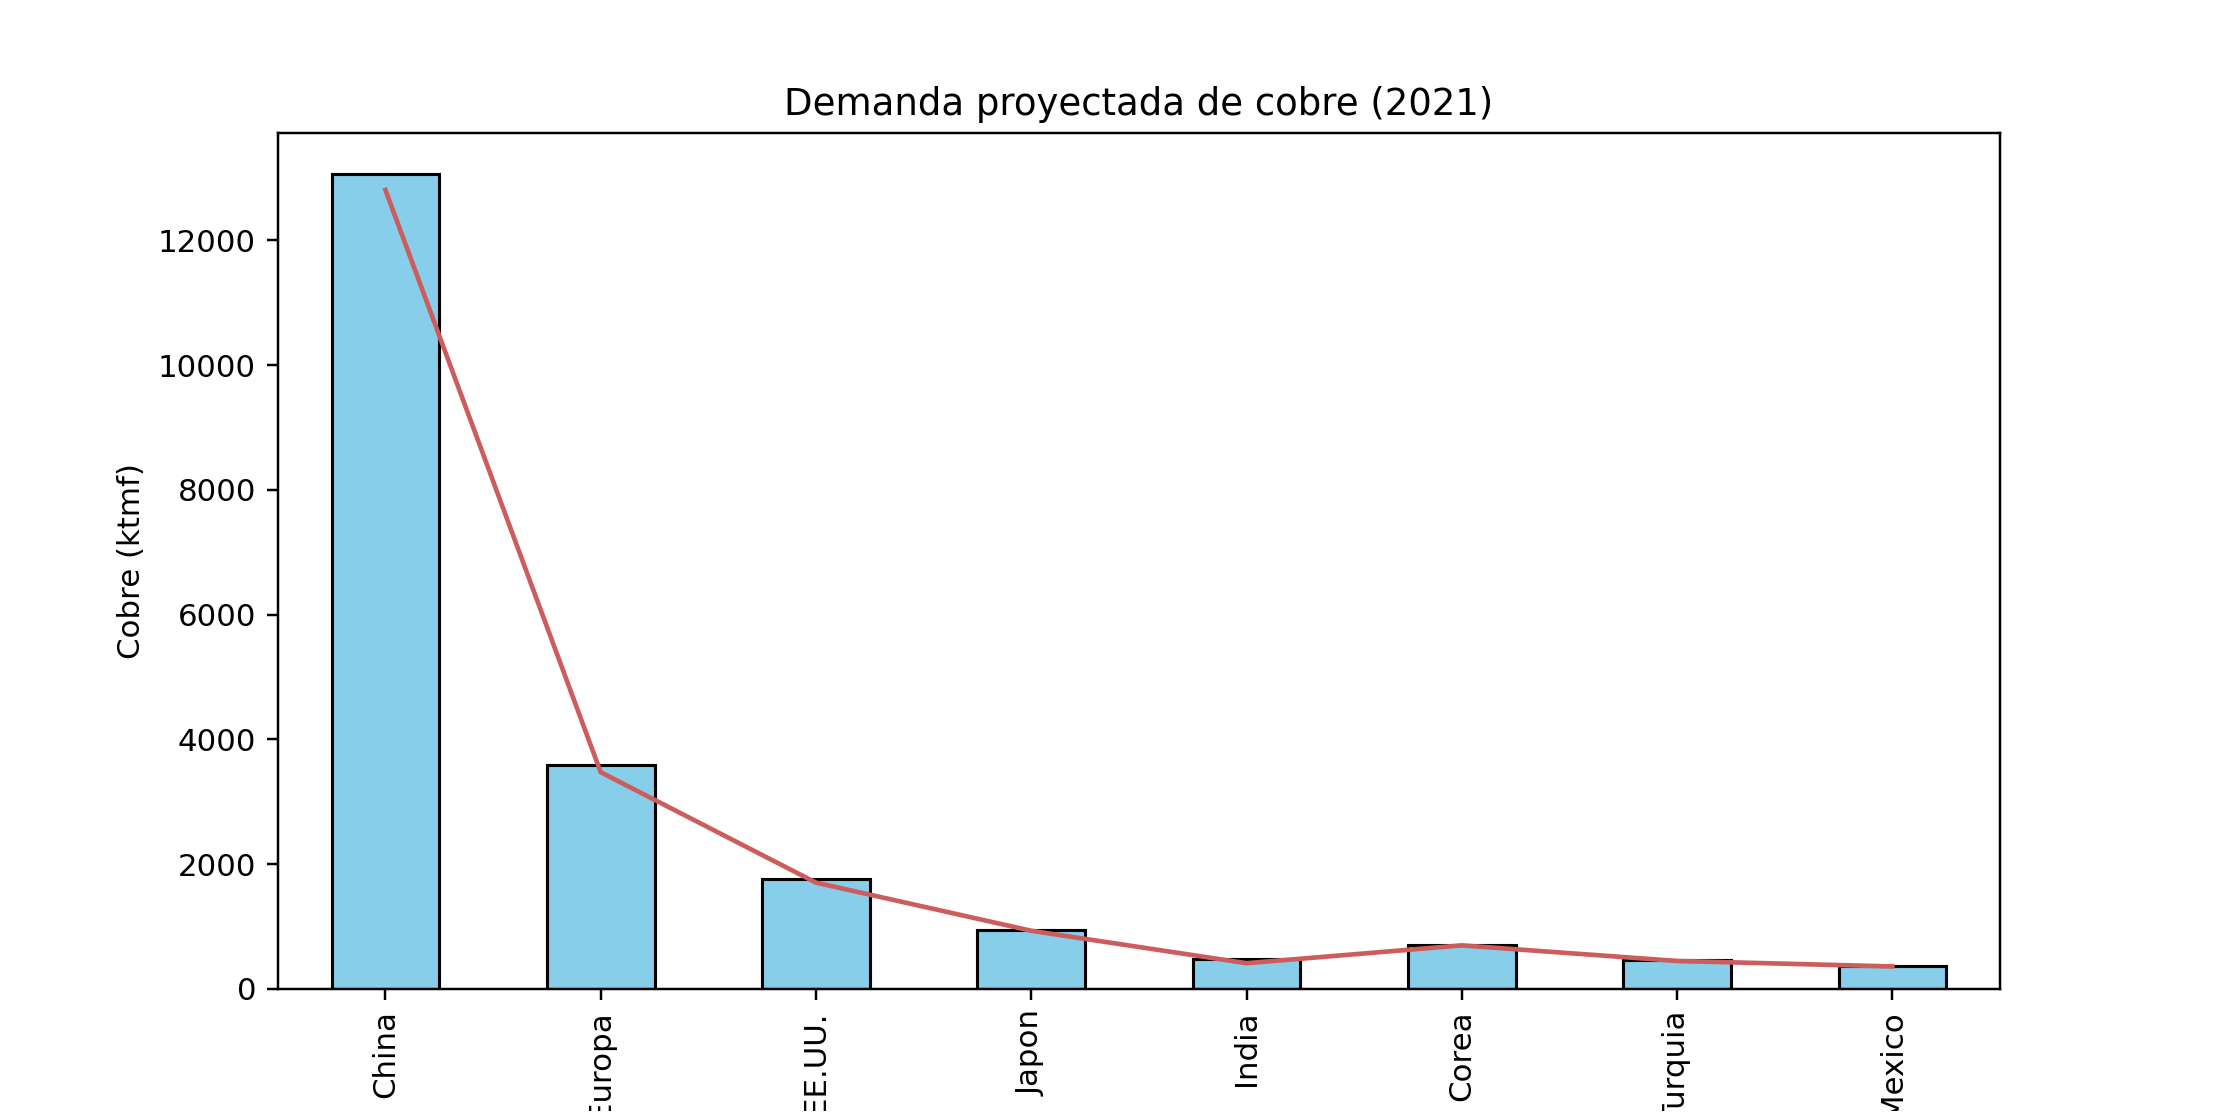

In [26]:
# Un gráfico de líneas sencillo (notemos los argumentos del método plot()).
cu_dem_20.plot(
    kind="line", xlabel="País", ylabel="Cobre (ktmf)",
    title="Demanda proyectada de cobre (2020)", color="indianred",
    figsize=(10, 5)
);

In [27]:
# Un gráfico de barras sencillo (notemos los argumentos del método plot()).
cu_dem_21.plot(
    kind="bar", xlabel="País", ylabel="Cobre (ktmf)",
    title="Demanda proyectada de cobre (2021)", color="skyblue",
    edgecolor="black", figsize=(10, 5)
);

## DataFrames.
Los DataFrames son estructuras de datos de **Pandas** que permiten generalizar el concepto de serie. En este contexto, un DataFrame puede definirse como una sucesión continua de series, cada una de las cuales está referenciada por el mismo índice que permite identificar a cualquiera de sus filas. Sin embargo, los DataFrames también cuentan con un segundo juego de índices, los que permiten individualizar sus columnas con un nombre respectivo. Por lo tanto, podemos pensar en los DataFrames como versiones especializadas de los arreglos bidimensionales de **Numpy**, pero con la flexibilidad de las series tanto en la identificación de filas como de columnas.

Del mismo modo que las series, los DataFrames también pueden ser pensados como versiones mejoradas de diccionarios, pero en más de dos niveles. En **Pandas**, el constructor de DataFrames corresponde a la clase `pd.DataFrame()`, la cual toma como mínimo un argumento denominado `data`, que corresponde a los valores que se almacenarán en él (y que suele ser un arreglo bidimensional de **Numpy**, aunque también podría ser una lista anidada o incluso otro DataFrame). También es posible definir, en forma explícita, el juego de índices tanto para las filas, con el argumento `index`, como para las columnas, con el argumento columns. Bastará con especificar tales índices mediante listas:

In [28]:
# Constructor de DataFrames.
df = pd.DataFrame(
    data=np.array([[2, 1, 3], [4, 0, 3], [0, 9, 1]]),
    index=["fila_1", "fila_2", "fila_3"],
    columns=["col_1", "col_2", "col_3"]
)
df

,col_1,col_2,col_3
fila_1,2,1,3
fila_2,4,0,3
fila_3,0,9,1


De la misma forma que las series, los DataFrames cuentan con atributos que permiten recuperar tanto índices (`index`) como valores almacenados en ellos (`values`). Sin embargo, también cuentan con el atributo `columns`, que permite recuperar el juego de índices asociados a sus columnas:

In [29]:
# El atributo values permite recuperar los datos almacenados en un DataFrame
# (en un formato de arreglo de Numpy bidimensional).
df.values

array([[2, 1, 3],
       [4, 0, 3],
       [0, 9, 1]])

In [30]:
# El atributo index permite recuperar el índice asociado a las filas del DataFrame.
df.index

Index(['fila_1', 'fila_2', 'fila_3'], dtype='object')

In [31]:
# El atributo index permite recuperar el índice asociado a las columnas del DataFrame.
df.columns

Index(['col_1', 'col_2', 'col_3'], dtype='object')

Siempre podremos construir un DataFrame mediante su constructor, tomando como base un diccionario cuya estructura sea de, al menos, dos niveles. El siguiente diccionario, que llamamos `owners_dict`, lista las empresas propietarias de las operaciones mineras detalladas en el diccionario `production_dict`, construido con anterioridad:

In [32]:
# Otro diccionario, pero esta vez de propietarios de las operaciones mineras.
owners_dict = {
    "Escondida": "BHP",
    "Collahuasi": "Anglo American PLC & Glencore",
    "El Teniente": "Codelco",
    "Los Bronces": "Anglo American PLC",
    "Los Pelambres": "Antofagasta Minerals",
    "Radomiro Tomic": "Codelco",
    "Chuquicamata": "Codelco",
    "Centinela": "Antofagasta Minerals",
    "Spence": "BHP",
    "Sierra Gorda": "KGHM International",
    "Ministro Hales": "Codelco",
    "Andina": "Codelco",
    "Candelaria": "Lundin Mining",
    "Caserones": "SCM Lumina Copper Chile",
    "Gabriela Mistral": "Codelco"
}

Si usamos ambos diccionarios, podemos construir fácilmente un DataFrame para englobar tanto la producción de fino como la propiedad de estas operaciones mineras como sigue:

In [33]:
# Llevamos ambos diccionarios a un DataFrame.
data = pd.DataFrame({"Produccion": production_dict, "Empresa": owners_dict})
data

,Produccion,Empresa
Escondida,1011,BHP
Collahuasi,630,Anglo American PLC & Glencore
El Teniente,460,Codelco
Los Bronces,370,Anglo American PLC
Los Pelambres,336,Antofagasta Minerals
Radomiro Tomic,326,Codelco
Chuquicamata,319,Codelco
Centinela,274,Antofagasta Minerals
Spence,203,BHP
Sierra Gorda,198,KGHM International


Notemos que la estructura de nuestro DataFrame data es la de dos series unidas por el mismo índice de filas, y para las cuales cada columna es individualizada igualmente por un índice. Para todo DataFrame, podemos seleccionar cualquier columna del mismo especificando su índice entre corchetes. El resultado de seleccionar una determinada columna de un DataFrame es que ésta será retornada como una serie:

In [34]:
# Las columnas pueden seleccionarse especificando su nombre entre corchetes.
data["Empresa"]

Escondida                                     BHP
Collahuasi          Anglo American PLC & Glencore
El Teniente                               Codelco
Los Bronces                    Anglo American PLC
Los Pelambres                Antofagasta Minerals
Radomiro Tomic                            Codelco
Chuquicamata                              Codelco
Centinela                    Antofagasta Minerals
Spence                                        BHP
Sierra Gorda                   KGHM International
Ministro Hales                            Codelco
Andina                                    Codelco
Candelaria                          Lundin Mining
Caserones                 SCM Lumina Copper Chile
Gabriela Mistral                          Codelco
Name: Empresa, dtype: object

Podemos, igualmente, individualizar cualquier elemento de un DataFrame usando igualmente la notación entre corchetes. En este esquema de selección, primero especificamos el rótulo de la columna de interés con su propio corchete, y luego el rótulo de la fila respectiva, también con su propio corchete:

In [35]:
# Individualizacion de un dato específico.
data["Empresa"]["Centinela"]

'Antofagasta Minerals'

El **esquema de selección** anterior no es el más adecuado para seleccionar datos, pero siempre podemos recurrir a él. Sin embargo, un poco más adelante veremos esquemas más eficientes. Sin embargo, sí es muy común utilizar un único corchete para seleccionar columnas individuales de un DataFrame.

Vamos a agregar más información a nuestro DataFrame por medio de la construcción de un nuevo diccionario, en el cual especificaremos la región en la cual se ubica cada una de las operaciones mineras:

In [36]:
# Y otro diccionario... (esta vez, con las ubicaciones de las operaciones).
location_dict = {
    "Escondida": "Antofagasta",
    "Collahuasi": "Tarapaca",
    "El Teniente": "Lib. Bdo. O'Higgins",
    "Los Bronces": "Metropolitana",
    "Los Pelambres": "Coquimbo",
    "Radomiro Tomic": "Antofagasta",
     "Chuquicamata": "Antofagasta",
    "Centinela": "Antofagasta",
    "Spence": "Antofagasta",
    "Sierra Gorda": "Antofagasta",
    "Ministro Hales": "Antofagasta",
    "Andina": "Valparaiso",
    "Candelaria": "Atacama",
    "Caserones": "Atacama",
    "Gabriela Mistral": "Antofagasta"
}

In [37]:
# Unimos todo en un DataFrame.
data = pd.DataFrame({
    "Produccion": production_dict, 
    "Empresa": owners_dict, 
    "Región": location_dict
})

In [38]:
data

,Produccion,Empresa,Región
Escondida,1011,BHP,Antofagasta
Collahuasi,630,Anglo American PLC & Glencore,Tarapaca
El Teniente,460,Codelco,Lib. Bdo. O'Higgins
Los Bronces,370,Anglo American PLC,Metropolitana
Los Pelambres,336,Antofagasta Minerals,Coquimbo
Radomiro Tomic,326,Codelco,Antofagasta
Chuquicamata,319,Codelco,Antofagasta
Centinela,274,Antofagasta Minerals,Antofagasta
Spence,203,BHP,Antofagasta
Sierra Gorda,198,KGHM International,Antofagasta


Para seleccionar la información de más de una columna, bastará con especificar los nombres de tales columnas dentro de una lista, usando la misma notación entre corchetes anterior (es decir, fancy indexing). De esta manera, si queremos seleccionar la data relativa a las producciones y ubicaciones de las operaciones mineras especificadas en nuestro DataFrame, obtendremos otro DataFrame:

In [39]:
# Selección de más de una columna en un DataFrame.
data[["Produccion", "Región"]]

,Produccion,Región
Escondida,1011,Antofagasta
Collahuasi,630,Tarapaca
El Teniente,460,Lib. Bdo. O'Higgins
Los Bronces,370,Metropolitana
Los Pelambres,336,Coquimbo
Radomiro Tomic,326,Antofagasta
Chuquicamata,319,Antofagasta
Centinela,274,Antofagasta
Spence,203,Antofagasta
Sierra Gorda,198,Antofagasta


Es importante destacar que tanto las series como los DataFrames son estructuras mutables desde la perspectiva de los datos que éstos almacenan, lo que es similar a lo que ocurre con los arreglos de **Numpy**. Por esta razón, podemos modificar cualquier valor en un DataFrame (o en una serie) mediante la selección de dicho valor:

In [40]:
# Modificamos un valor cualquier en un DataFrame mediane una simple selección.
data["Región"]["El Teniente"] = "O'Higgins"
data

/var/folders/sn/hlgjzv2n1537dplx8bvvj1c80000gn/T/ipykernel_3290/461080483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Región"]["El Teniente"] = "O'Higgins"


,Produccion,Empresa,Región
Escondida,1011,BHP,Antofagasta
Collahuasi,630,Anglo American PLC & Glencore,Tarapaca
El Teniente,460,Codelco,O'Higgins
Los Bronces,370,Anglo American PLC,Metropolitana
Los Pelambres,336,Antofagasta Minerals,Coquimbo
Radomiro Tomic,326,Codelco,Antofagasta
Chuquicamata,319,Codelco,Antofagasta
Centinela,274,Antofagasta Minerals,Antofagasta
Spence,203,BHP,Antofagasta
Sierra Gorda,198,KGHM International,Antofagasta


Notemos que, al modificar un valor de manera directa como en el caso anterior, **Pandas** inmediatamente nos levanta una advertencia (`SettingWithCopyWarning`) en la cual se aconseja usar una copia del DataFrame para después modificarla. Esta es una muy buena práctica, ya que, si bien los DataFrames son estructuras parcialmente mutables, modificarlas una y otra vez puede llevar a ambigüedades en un análisis de sus datos.

La mutabilidad también permite construir nuevos registros para nuestro DataFrame simplemente definiéndolos:

In [41]:
# Creación sencilla de una nueva columna en nuestro DataFrame.
data["Porcentaje produccion Chile"] = np.array([
    18.0, 11.2, 8.2, 6.6, 6.0, 5.8, 5.7, 4.9, 3.6, 3.5, 3.2, 3.2, 2.1, 2.0, 1.8
])
data

,Produccion,Empresa,Región,Porcentaje produccion Chile
Escondida,1011,BHP,Antofagasta,18.0
Collahuasi,630,Anglo American PLC & Glencore,Tarapaca,11.2
El Teniente,460,Codelco,O'Higgins,8.2
Los Bronces,370,Anglo American PLC,Metropolitana,6.6
Los Pelambres,336,Antofagasta Minerals,Coquimbo,6.0
Radomiro Tomic,326,Codelco,Antofagasta,5.8
Chuquicamata,319,Codelco,Antofagasta,5.7
Centinela,274,Antofagasta Minerals,Antofagasta,4.9
Spence,203,BHP,Antofagasta,3.6
Sierra Gorda,198,KGHM International,Antofagasta,3.5


Todo DataFrame, al igual que los arreglos bidimensionales de **Numpy**, puede transponerse, invirtiendo filas y columnas. Dicha transposición se logra mediante el mismo atributo que tienen tales arreglos, definido como `T`:

In [42]:
# Transposición de un DataFrame.
df.T

,fila_1,fila_2,fila_3
col_1,2,4,0
col_2,1,0,9
col_3,3,3,1


En un DataFrame, podemos construir generar apilamientos de información mezclando los índices de filas con los índices de columnas. Esto permite transformar cualquier DataFrame en una **serie multinivel** (o serie jerárquicamente indexada). Para ello, usamos el método `stack()`:

In [43]:
# Apilamiento de un DataFrame.
data_stacked = data.stack()
data_stacked

Escondida         Produccion                                              1011
                  Empresa                                                  BHP
                  Región                                           Antofagasta
                  Porcentaje produccion Chile                             18.0
Collahuasi        Produccion                                               630
                  Empresa                        Anglo American PLC & Glencore
                  Región                                              Tarapaca
                  Porcentaje produccion Chile                             11.2
El Teniente       Produccion                                               460
                  Empresa                                              Codelco
                  Región                                             O'Higgins
                  Porcentaje produccion Chile                              8.2
Los Bronces       Produccion                        

No lo parece, pero `data_stacked` es efectivamente una serie. Podemos comprobarlo:

In [44]:
# Comprobamos que data_stacked es una serie.
type(data_stacked)

pandas.core.series.Series

Esta serie se denomina multinivel porque su índice tiene dos niveles de selección de información:

In [45]:
# El índice de data_stacked es un multi-índice (o índice jerárquico).
data_stacked.index

MultiIndex([(       'Escondida',                  'Produccion'),
            (       'Escondida',                     'Empresa'),
            (       'Escondida',                      'Región'),
            (       'Escondida', 'Porcentaje produccion Chile'),
            (      'Collahuasi',                  'Produccion'),
            (      'Collahuasi',                     'Empresa'),
            (      'Collahuasi',                      'Región'),
            (      'Collahuasi', 'Porcentaje produccion Chile'),
            (     'El Teniente',                  'Produccion'),
            (     'El Teniente',                     'Empresa'),
            (     'El Teniente',                      'Región'),
            (     'El Teniente', 'Porcentaje produccion Chile'),
            (     'Los Bronces',                  'Produccion'),
            (     'Los Bronces',                     'Empresa'),
            (     'Los Bronces',                      'Región'),
            (     'Los Br

Más adelante profundizaremos en series (y DataFrames) con este tipo de índices.

Es posible “desapilar” una serie mulitinivel mediante el método `unstack()`:

In [46]:
# Siempre podemos desapilar una serie multinivel.
data_stacked.unstack()

,Produccion,Empresa,Región,Porcentaje produccion Chile
Escondida,1011,BHP,Antofagasta,18.0
Collahuasi,630,Anglo American PLC & Glencore,Tarapaca,11.2
El Teniente,460,Codelco,O'Higgins,8.2
Los Bronces,370,Anglo American PLC,Metropolitana,6.6
Los Pelambres,336,Antofagasta Minerals,Coquimbo,6.0
Radomiro Tomic,326,Codelco,Antofagasta,5.8
Chuquicamata,319,Codelco,Antofagasta,5.7
Centinela,274,Antofagasta Minerals,Antofagasta,4.9
Spence,203,BHP,Antofagasta,3.6
Sierra Gorda,198,KGHM International,Antofagasta,3.5


La mayoría de los métodos de **Pandas** que se aplican sobre series y DataFrames retornan copias de éstos, y no generan modificaciones en el acto. Sin embargo, algunos de estos métodos sí disponen de la opción de generar tales modificaciones de inmediato (profundizaremos en eso más adelante). En general, siempre es una buena práctica, a la hora de trabajar con series o DataFrames, generar una copia de éstos para su manipulación, y así evitar posibles cambios en la data original que queremos trabajar. Siempre podremos copiar una estructura de datos de este tipo mediante el método `copy()`:

In [47]:
# El método copy() nos permite crear copias de nuestras series o DataFrames.
data_copied = data.copy()
data_copied

,Produccion,Empresa,Región,Porcentaje produccion Chile
Escondida,1011,BHP,Antofagasta,18.0
Collahuasi,630,Anglo American PLC & Glencore,Tarapaca,11.2
El Teniente,460,Codelco,O'Higgins,8.2
Los Bronces,370,Anglo American PLC,Metropolitana,6.6
Los Pelambres,336,Antofagasta Minerals,Coquimbo,6.0
Radomiro Tomic,326,Codelco,Antofagasta,5.8
Chuquicamata,319,Codelco,Antofagasta,5.7
Centinela,274,Antofagasta Minerals,Antofagasta,4.9
Spence,203,BHP,Antofagasta,3.6
Sierra Gorda,198,KGHM International,Antofagasta,3.5


Los DataFrames también disponen de un método `plot()` para generar gráficos rápidos de la data contenida en ellos, apoyándonos de los juegos de índices para las filas y columnas. Cuando abordemos la librería **Matplotlib**, hablaremos más en detalle en relación a la creación de gráficos:

<IPython.core.display.Javascript object>


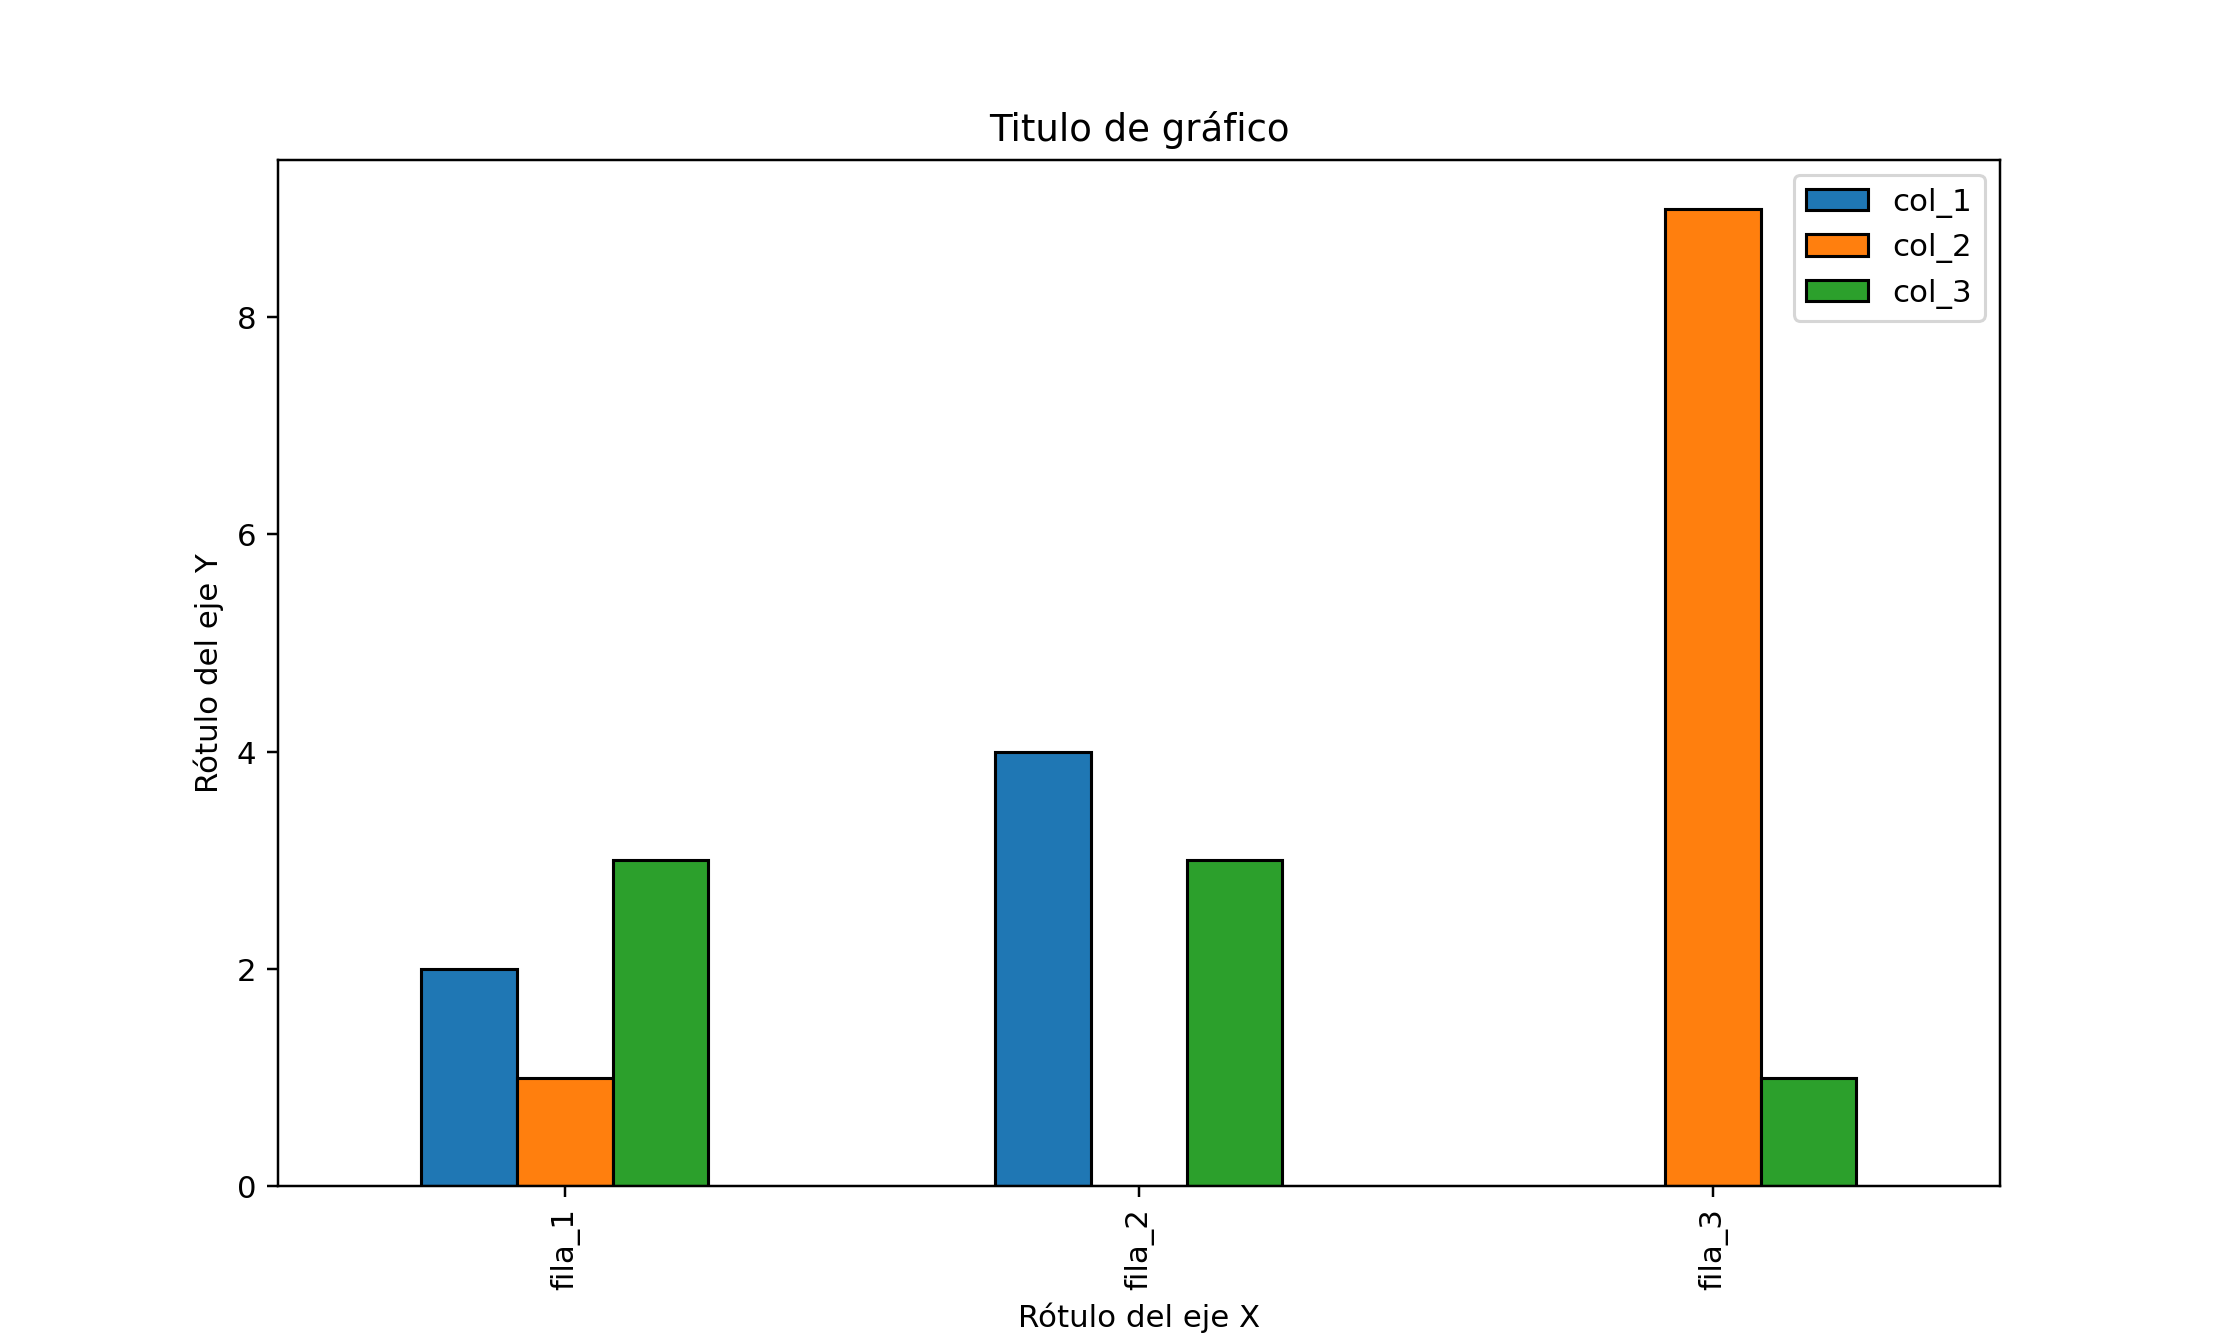

In [48]:
# El método plot() también está disponible para los DataFrames.
df.plot(
    kind="bar", figsize=(10, 6), title="Titulo de gráfico", 
    xlabel="Rótulo del eje X", ylabel="Rótulo del eje Y",
    edgecolor="black"
); 

## Índices.
Hemos visto que tanto las series como los DataFrames contienen un índice explícito que nos permite tanto modificar como referenciar nuestros datos. El objeto `pd.Index` es una estructura interesante en sí misma, y puede ser entendida tanto como un arreglo inmutable como un conjunto ordenado (técnicamente, un multiconjunto, ya que pd.Index permite elementos repetidos en su estructura). Tales puntos de vista tienen consecuencias interesantes en las operaciones ejecutables sobre índices. Para ejemplificar aquello, construyamos un objeto tipo `pd.Index` a partir de una lista de enteros:

In [49]:
# Definimos una lista con enteros.
idx = [2*n for n in range(5)]

In [50]:
# Construimos un índice a partir de la lista anterior.
index = pd.Index(idx)
index

Int64Index([0, 2, 4, 6, 8], dtype='int64')

Vemos que **Pandas** nos indica que el índice que hemos creado es del tipo `Int64Index`, lo que significa que está compuesto por números enteros de 64 bits. Un índice de **Pandas** tiene algunas similitudes con los arreglos de **Numpy**, ya que podemos seleccionar cualquier elemento del mismo especificando la posición de dicho elemento entre corchetes, o bien, recuperar un subconjunto de elementos del índice por medio de un slicing:

In [51]:
# Selección de un elemento del índice.
index[1]

2

In [52]:
# Selección de varios elementos del índice.
index[::2]

Int64Index([0, 4, 8], dtype='int64')

Los índices, además, también tienen ciertos atributos que son heredados de los arreglos de **Numpy**:

In [53]:
index.size # Número de elementos de un índice.

5

In [54]:
index.shape # Geometría de un índice.

(5,)

In [55]:
index.ndim # Número de dimensiones de un índice.

1

In [56]:
index.dtype # Tipo de dato de los elementos de un índice.

dtype('int64')

Sin embargo, **los índices son inmutables**; si queremos cambiar un valor del mismo mediante simple selección, se levantará un error de tipo:

In [57]:
try:
    index[1] = 0
except TypeError as e:
    print(e)

Index does not support mutable operations


Esta inmutabilidad hace más seguro el compartir índices entre múltiples DataFrames, evitando los potenciales problemas devenidos de la modificación por simple selección de los índices en una operación de este tipo (como veremos más adelante).

**Los índices también se comportan como conjuntos de Python**. Recordemos que los conjuntos, tal y como su nombre lo indica, son objetos nativos de Python que permiten operar algebraicamente con sus elementos mediante el uso de operaciones típicas de ese tipo de objetos, tales como uniones, intersecciones, complementos, entre otras. De esta manera, si definimos otro índice:

In [58]:
# Construimos otro índice, esta vez con números impares.
index_2 = pd.Index([2*n + 1 for n in range(5)])
index_2

Int64Index([1, 3, 5, 7, 9], dtype='int64')

Podemos unir ambos índices previamente construidos mediante el método `union()`:

In [59]:
# Unión de dos índices.
index.union(index_2)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

También podemos obtener su intersección mediante el método `intersection()`:

In [60]:
# Intersección de dos índices.
index.intersection(index_2)

Int64Index([], dtype='int64')

Veremos más operaciones de este tipo un poco más adelante.

## Selección de información.
Cuando aprendimos a trabajar con los arreglos de **Numpy**, discutimos en detalle métodos y herramientas para seleccionar, setear y modificar valores de dichos arreglos. Éstos incluyen indexación simple (por ejemplo, `x[2, 1]`), slicing (por ejemplo, `x[:1, :5]`), masking (por ejemplo, `x[x >= 0]`), fancy indexing (por ejemplo, `x[0, [1, 5]]`), y combinaciones de las herramientas anteriores. A continuación, estudiaremos métodos similares para poder modificar y acceder a los valores que constituyen las estructuras de datos básicas de **Pandas**: Series y DataFrames. La indexación sobre objetos de **Pandas** se sentirá muy familiar, luego de haber aprendido a ejecutar estas mismas operaciones sobre arreglos de **Numpy**.

Partiremos con el caso más sencillo, que corresponde a la selección de datos en series. Como ya vimos un poco más atrás, las series actúan en muchas facetas como arreglos unidimensionales, y en otras, como diccionarios de Python. Con ambas analogías en mente, podremos entender sin demasiado problema el cómo indexar elementos de una serie.
Como en el caso de un diccionario, la serie nos provee de una forma de mapeo de tipo (índice, valor), similar al que haríamos al tratar de mapear valores en un diccionario a partir de sus llaves. Por ejemplo:

In [61]:
# Construimos una serie para jugar con ella.
data = pd.Series(data=[0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [62]:
# Selección directa de un elemento de una serie.
data["b"]

0.5

Las series, al ser parcialmente mutables, pueden ser modificadas mediante una sintaxis típica de diccionarios (tal y como hicimos previamente con los DataFrames). De la misma forma en que generalmente extendemos la longitud de un diccionario mediante la asignación de una nueva llave, podemos extender una serie mediante la asignación de un índice nuevo, como sigue:

In [63]:
# Agregamos un valor nuevo a la serie por simple asignación.
data["e"] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Esta sencilla mutabilidad de los objetos constituye una característica muy conveniente: Bajo toda esta sencillez, **Pandas** está tomando decisiones respecto de la distribución de memoria y copia de datos que podrían tener lugar en operaciones así. De este modo, **Pandas** asume que el usuario, en general, no debería perder su tiempo en cuestiones de esta naturaleza (aunque podríamos, ciertamente).

Podemos aprovechar la similitud de una serie a un arreglo unidimensional y aplicar las mismas operaciones de selección que aprendimos para esas estructuras de datos. Por ejemplo:

In [64]:
# Slicing explicitando los índices.
data['a': 'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [65]:
# Los índices no tienen porqué ser especificados explícitamente.
data[0: 3]

a    0.25
b    0.50
c    0.75
dtype: float64

In [66]:
# Podemos realizar filtros mediante masking.
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [67]:
# Y también fancy indexing.
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

Entre todas las operaciones anteriores, la que más lugar a confusión nos puede dar corresponde al slicing. Notemos que si generamos un slicing con índices explícitos (por ejemplo, `data['a': 'c']`), el índice final se incluye en el slice, mientras que los slicings con índices implícitos (por ejemplo, `data[0: 2]`), el índice final se excluye del slice.

### Esquemas de indexación.
Las operaciones previamente presentadas pueden conformar una fuente de confusión. Por ejemplo, si nuestra serie tiene un índice entero explícito, una operación de indexado como `data[1]` usará los índices explícitos, mientras que una operación de slicing como `data[1: 3]` usará índices implícitos, como si se tratara de un arreglo o una lista de Python:

In [68]:
# Creamos una nueva serie.
data = pd.Series(data=['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [69]:
# Indexación con índice explícito.
data[1]

'a'

In [70]:
# Slicing con índices implícitos.
data[1: 3]

/var/folders/sn/hlgjzv2n1537dplx8bvvj1c80000gn/T/ipykernel_3290/4027821911.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data[1: 3]


3    b
5    c
dtype: object

A causa de esta potencial confusión en el caso de los índices enteros, **Pandas** nos provee de algunos métodos que son capaces de exponer de manera explícita los esquemas de indexación de una serie o de un DataFrame. No se trata de métodos funcionales, pero bastan para exponer una interfaz particular de selección de datos en cualquier estructura de datos de Pandas.

Tanto las series como los DataFrames, como hemos visto previamente, admiten selecciones de información mediante el uso de corchetes. Por defecto, los DataFrames permiten seleccionar datos de una posición definida por una determinada fila y columna, usando los nombres de dicha fila y columna en corchetes separados, siguiendo un esquema de indexación del tipo `data["columna_j"]["fila_i"]`. Sin embargo, tal esquema puede llevarnos a ciertas ambigüedades, considerando que, en la sección anterior, aprendimos a trabajar con arreglos de **Numpy**, y su esquema de indexación es ciertamente diferente, considerando primero filas, y luego columnas. 

Afortunadamente, dadas todas estas posibles ambigüedades, podemos seleccionar información siguiendo un esquema diferente. Existen dos métodos de indexación que permiten ya sea explicitar los índices de una estructura de datos al realizar una selección de información, o bien, no hacerlo y tratar estas estructuras como si fueran arreglos unidimensionales (para el caso de las series) o bidimensionales (para el caso de los DataFrames). El primer método de indexado es `loc[]`, que sólo nos dejará seleccionar información de una serie o DataFrame explicitando el o los índices respectivos:

In [71]:
# Indexamos de manera explícita una serie mediante loc[].
data.loc[1]

'a'

In [72]:
# Slicing usando este esquema de indexación.
data.loc[1: 3]

1    a
3    b
dtype: object

Este esquema de indexación, en el caso de un DataFrame, permite seleccionar información conforme un esquema que nos es familiar desde Numpy: Explicitando primero la fila, y luego la columna respectiva. De esta manera, dicho esquema es del tipo `data.loc["fila_i", "columna_j"]`:

In [73]:
# Creamos un DataFrame para probar los esquemas de indexación.
df = pd.DataFrame({
    "Produccion": production_dict, 
    "Empresa": owners_dict, 
    "Region": location_dict
})
df

,Produccion,Empresa,Region
Escondida,1011,BHP,Antofagasta
Collahuasi,630,Anglo American PLC & Glencore,Tarapaca
El Teniente,460,Codelco,Lib. Bdo. O'Higgins
Los Bronces,370,Anglo American PLC,Metropolitana
Los Pelambres,336,Antofagasta Minerals,Coquimbo
Radomiro Tomic,326,Codelco,Antofagasta
Chuquicamata,319,Codelco,Antofagasta
Centinela,274,Antofagasta Minerals,Antofagasta
Spence,203,BHP,Antofagasta
Sierra Gorda,198,KGHM International,Antofagasta


El esquema de indexación por medio de `loc[]` en un DataFrame sigue el orden (fila, columna) al seleccionar información:

In [74]:
# Seleccionamos información de una fila y columna específica.
df.loc["Chuquicamata", "Produccion"]

319

Esto también es válido para cualquier tipo de slicing, masking o fancy indexing:

In [75]:
# El slicing en DataFrames trabaja exactamente igual que en arreglos de Numpy.
df.loc["Radomiro Tomic": "Sierra Gorda", "Produccion": "Empresa"]

,Produccion,Empresa
Radomiro Tomic,326,Codelco
Chuquicamata,319,Codelco
Centinela,274,Antofagasta Minerals
Spence,203,BHP
Sierra Gorda,198,KGHM International


In [76]:
# Mediante masking, podemos construir filtros sencillos para nuestra data.
df.loc[df["Produccion"] >= 200]

,Produccion,Empresa,Region
Escondida,1011,BHP,Antofagasta
Collahuasi,630,Anglo American PLC & Glencore,Tarapaca
El Teniente,460,Codelco,Lib. Bdo. O'Higgins
Los Bronces,370,Anglo American PLC,Metropolitana
Los Pelambres,336,Antofagasta Minerals,Coquimbo
Radomiro Tomic,326,Codelco,Antofagasta
Chuquicamata,319,Codelco,Antofagasta
Centinela,274,Antofagasta Minerals,Antofagasta
Spence,203,BHP,Antofagasta


In [77]:
# Y estos filtros pueden ser respecto de cualquier combinación de filas y/o columnas.
df.loc[(df["Produccion"] >= 200) & (df["Region"] == "Antofagasta")]

,Produccion,Empresa,Region
Escondida,1011,BHP,Antofagasta
Radomiro Tomic,326,Codelco,Antofagasta
Chuquicamata,319,Codelco,Antofagasta
Centinela,274,Antofagasta Minerals,Antofagasta
Spence,203,BHP,Antofagasta


In [78]:
# Mediante fancy indexing podemos especificar ciertas filas o columnas.
df.loc[["El Teniente", "Chuquicamata", "Radomiro Tomic", "Andina"], ["Produccion", "Region"]]

,Produccion,Region
El Teniente,460,Lib. Bdo. O'Higgins
Chuquicamata,319,Antofagasta
Radomiro Tomic,326,Antofagasta
Andina,177,Valparaiso


Por otro lado, también disponemos de un esquema de indexación que prescinde de explicitar los índices de una serie o DataFrame, tratando a estas estructuras de datos como si fueran arreglos unidimensionales y/o bidimensionales de **Numpy**, según sea el caso. Tal esquema se genera por medio del método `iloc[]`:

In [79]:
# El método iloc[] nos permite tratar a cualquier serie como un arreglo unidimensional cuando
# seleccionamos información.
data.iloc[1]

'b'

In [80]:
data.iloc[-1]

'c'

In [81]:
# ... y a los DataFrames, como arreglos unidimensionales.
df.iloc[-1, :]

Produccion            101
Empresa           Codelco
Region        Antofagasta
Name: Gabriela Mistral, dtype: object

### Convenciones de orden.
Existen algunas convenciones adicionales de indexación que podrían parecer extrañas en primera instancia, pero que, de todas maneras, pueden llegar a ser extremadamente útiles en la práctica. Tales convenciones son especialmente relevantes cuando tratamos con DataFrames.

En un DataFrame, el esquema de selección por defecto al rotular entre corchetes (sin usar indexadores como `loc[]` o `iloc[]`) siempre aplica por defecto sobre los índices relativos a las columnas. De esta manera, si escribimos `df["col_j"]`, **Pandas** entenderá que estamos buscando la columna llamada `"col_j"` en el DataFrame `df`. En efecto:

In [82]:
# Al escribir un nombre entre corchetes luego del nombre de un DataFrame, Pandas siempre asumirá
# que estamos buscando una determinada columna en dicho DataFrame.
df["Produccion"]

Escondida           1011
Collahuasi           630
El Teniente          460
Los Bronces          370
Los Pelambres        336
Radomiro Tomic       326
Chuquicamata         319
Centinela            274
Spence               203
Sierra Gorda         198
Ministro Hales       182
Andina               177
Candelaria           119
Caserones            110
Gabriela Mistral     101
Name: Produccion, dtype: int64

Por lo tanto, si buscamos una determinada fila en un DataFrame, siempre tendremos que usar algún indexador:

In [83]:
# En un DataFrame, si queremos seleccionar una fila, tendremos que usar un indexador.
df.loc["Los Pelambres"]

Produccion                     336
Empresa       Antofagasta Minerals
Region                    Coquimbo
Name: Los Pelambres, dtype: object

Al contrario de lo que ocurre con la simple selección, al realizar un slicing entre corchetes sin especificar un indexador, **Pandas** siempre entenderá que dicha búsqueda se hará con respecto a las filas del DataFrame:

In [84]:
# En el slicing, si no usamos indexadores, Pandas entiende que siempre buscamos por filas.
df["Los Bronces": "Centinela"]

,Produccion,Empresa,Region
Los Bronces,370,Anglo American PLC,Metropolitana
Los Pelambres,336,Antofagasta Minerals,Coquimbo
Radomiro Tomic,326,Codelco,Antofagasta
Chuquicamata,319,Codelco,Antofagasta
Centinela,274,Antofagasta Minerals,Antofagasta


Por lo tanto, si queremos generar un slicing en un DataFrame con respecto a las columnas, nuevamente, tendremos que hacer uso de algún indexador:

In [85]:
# Para realizar un slicing en un DataFrame con referencia a sus índices de columnas, necesitamos
# usar un indexador.
df.loc[:, :"Empresa"]

,Produccion,Empresa
Escondida,1011,BHP
Collahuasi,630,Anglo American PLC & Glencore
El Teniente,460,Codelco
Los Bronces,370,Anglo American PLC
Los Pelambres,336,Antofagasta Minerals
Radomiro Tomic,326,Codelco
Chuquicamata,319,Codelco
Centinela,274,Antofagasta Minerals
Spence,203,BHP
Sierra Gorda,198,KGHM International


Las convenciones anteriores para el caso de la selección y del slicing en DataFrames no llevan un nombre específico, pero sin duda son útiles para entender cómo **Pandas** trabaja por defecto sobre sus estructuras de datos si optamos por no especificar una forma de indexar al seleccionar información.

### Filtrado.
Una tarea importante al trabajar con series o DataFrames y que se desprende de cualquier análisis de datos corresponde al filtrado de información conforme algún criterio o información. En las estructuras de datos de **Pandas**, una primera forma de filtrar información es mediante el uso de masking, de la misma forma que lo haríamos en arreglos de **Numpy**. Ya hemos visto ejemplos de esto previamente, pero ahora lo explicaremos más en detalle.

Partamos pues construyendo un DataFrame (para las series, las operaciones de filtrado son totalmente análogas), el cual tendrá un total de 100 filas y 3 columnas. Cada fila corresponderá a un día determinado de observaciones sobre una planta de chancado primario. La primera columna corresponderá al procesamiento de mineral en el chancador, la segunda, a la utilización efectiva promedio de la flota de transporte de la mina respectiva, y la tercera, a la fracción porcentual de mineral de tamaño grueso (+1’’) que llega a la planta. Usaremos el generador de números aleatorios de **Numpy** para construir este DataFrame:

In [86]:
# Construimos un DataFrame para comenzar a filtrar información.
rng = np.random.default_rng(42) # Semilla aleatoria fija.

In [87]:
x1 = rng.normal(loc=3200, scale=580, size=100) # Tratamiento de chancado primario.
x2 = rng.lognormal(mean=4, sigma=0.2, size=100) # Utilización efectiva de flota CAEX.
x3 = rng.normal(loc=30, scale=12.5, size=100) # Proporción de mineral grueso (+1").

In [88]:
ch1_df = pd.DataFrame(
    data=np.array([x1, x2, x3]).T,
    columns=["Tratamiento CH1", "UE CAEX", "% Gruesos"]
)

Debido a que el DataFrame que hemos construido tiene un total de 100 filas, sería un despropósito imprimirlo completamente en pantalla. Sin embargo, podemos usar el método `head()` para mostrar las 5 primeras columnas de nuestro DataFrame a fin de revisar su estructura:

In [89]:
# Imprimimos en pantalla las primeras 5 filas de nuestro DataFrame.
ch1_df.head()

,Tratamiento CH1,UE CAEX,% Gruesos
0,3376.735906,50.621050,34.219682
1,2596.809218,70.799055,47.593523
2,3635.261694,50.843242,31.132311
3,3745.527536,63.275810,38.049235
4,2068.399591,45.298615,4.372849


El método `tail()` es completamente análogo a head(), permitiendo observar las últimas 5 columnas de nuestro DataFrame:

In [90]:
# Imprimimos en pantalla las últimas 5 filas de nuestro DataFrame.
ch1_df.tail()

,Tratamiento CH1,UE CAEX,% Gruesos
95,2360.674766,45.652328,32.206405
96,2432.834225,62.094993,33.699925
97,2621.596840,50.454855,25.351068
98,3431.869051,54.542250,8.040978
99,2674.822148,52.842269,34.099944


Un primer filtro de información que podemos querer observar en nuestro DataFrame es verificar cuáles son los registros tales que el tratamiento de chancado primario fue mayor a 3700 tph. Dicho filtro es sencillo de construir, ya que sólo requiere de una simple operación de masking:

In [91]:
# Tratamiento sobre 3700 tph.
ch1_df[ch1_df["Tratamiento CH1"] > 3700]

,Tratamiento CH1,UE CAEX,% Gruesos
3,3745.527536,63.275810,38.049235
10,3710.050825,59.554075,41.448782
13,3853.799900,40.886030,23.947882
18,3709.501175,75.215384,28.068679
22,3909.073976,57.054066,32.207167
30,4442.155609,50.503268,11.706975
35,3854.803930,44.562121,21.823169
46,3705.428691,48.307201,16.290180
57,4067.065961,66.456520,25.298049
59,3761.601446,43.077949,12.813802


El filtro anterior entrega como resultado un DataFrame con todas filas del original, tales que el tratamiento de chancado primario (la primera columna) es mayor que 3700 tph. Por supuesto, quizás la propia columna de tratamiento puede ser innecesaria en esta consulta de información, y queramos únicamente retener los valores del % de gruesos y de utilización efectiva de la flota de transporte tales que el tratamiento es mayor a 3700 tph. Para hacer esto, bastará con combinar la operación de masking anterior con fancy indexing, listando las columnas que queremos obtener:

In [92]:
# Tratamiento sobre 3700 tph, retornamos columnas de utilización efectiva y % de gruesos.
ch1_df[ch1_df["Tratamiento CH1"] > 3700][["UE CAEX", "% Gruesos"]]

,UE CAEX,% Gruesos
3,63.275810,38.049235
10,59.554075,41.448782
13,40.886030,23.947882
18,75.215384,28.068679
22,57.054066,32.207167
30,50.503268,11.706975
35,44.562121,21.823169
46,48.307201,16.290180
57,66.456520,25.298049
59,43.077949,12.813802


Si deseamos aplicar más de una condición en un filtro, y que éstas sean incluyentes, bastará con separar cada una de tales condiciones entre paréntesis mediante un operador de disyunción (`&`):

In [93]:
# Filtro conforme dos condiciones.
# Determinamos todos los registros de % de gruesos, tales que el tratamiento de chancado
# primario es mayor que 3500 tph, y la utilización efectiva de la flota CAEX es mayor o
# igual a 60%.
ch1_df[(ch1_df["Tratamiento CH1"] > 3500) & (ch1_df["UE CAEX"] >= 60)]["% Gruesos"]

3     38.049235
18    28.068679
26    61.468425
39    23.382007
48    66.313340
57    25.298049
64    35.894232
90    26.850283
Name: % Gruesos, dtype: float64

Una forma muy filtrar data en DataFrames y series es mediante el uso del método `query()`, el cual permite evaluar consultas de información conforme condiciones que se evalúan como argumento de este método. Por ejemplo, para replicar el filtro anterior con `query()`:

In [94]:
# Mismo filtro anterior, pero usando el método query().
ch1_df.query("`Tratamiento CH1` > 3500 & `UE CAEX` >= 60")["% Gruesos"]

3     38.049235
18    28.068679
26    61.468425
39    23.382007
48    66.313340
57    25.298049
64    35.894232
90    26.850283
Name: % Gruesos, dtype: float64

Entendamos bien este código: El método `query()` funciona por medio de evaluaciones de expresiones. En este caso, la expresión a evaluar e ``"`Tratamiento CH1` > 3500 & `UE CAEX` >= 60"``. Usamos tildes para diferenciar los rótulos de columnas (por ejemplo, ```UE CAEX```), debido a que tales rótulos presentan espacios (whitespaces). De no existir tales espacios, la diferenciación de los rótulos de columna mediante tildes no es necesaria.

El método `query()` está construido sobre otro método (de nivel superior) denominado `eval()`, que también se aplica a cualquier serie o DataFrame. El método `eval()` permite evaluar expresiones del mismo tipo que usamos en el método `query()`, retornando una serie con los mismos índices de fila que la serie o DataFrame originales, pero con valores Booleanos. Se asigna el valor `True` si dicha fila cumple con la condición evaluada previamente:

In [95]:
# Evaluamos qué filas de nuestro DataFrame cumplen con la condición a evaluar.
ch1_df.eval("`UE CAEX` >= 60")

0     False
1      True
2     False
3      True
4     False
      ...  
95    False
96     True
97    False
98    False
99    False
Length: 100, dtype: bool

## Comentarios finales.

Existen muchas otras operaciones básicas que podemos realizar sobre series y DataFrames, incluyendo por supuesto toda la operatoria que revisamos en **Numpy**, ya que **Pandas**, al estar construido sobre **Numpy**, es compatible con casi la mayoría de las operaciones que hemos aprendido para trabajar con arreglos.

A medida que vayamos avanzando en la asignatura, iremos revisando operaciones más específicas de cada caso (por ejemplo, ordenamientos, uniones, remuestreos, entre otros).